In [ ]:
SECURITY ANALYSIS - TAIL RISK SKEWNESS

In [15]:
import pandas as pd
import os

# Define the path to the folder containing the CSV files
folder_path = 'C:\\Users\\Aravind anand\\Documents\\diss code\\All Tail Risk Skewness'  

# Initialize an empty list to hold DataFrames
data_list = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        print(f"Reading file: {filename}")  # Debug: Print the file being read
        file_path = os.path.join(folder_path, filename)
        
        # Load each CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Extract platform name from the filename
        platform_name = filename.split('.')[0]
        print(f"Platform name extracted: {platform_name}")  # Debug: Print platform name
        
        # Add platform name as a new column in the DataFrame
        df['platform'] = platform_name
        
        # Ensure the 'DateTime' column is in datetime format if it exists
        if 'DateTime' in df.columns:
            try:
                df['DateTime'] = pd.to_datetime(df['DateTime'], format='mixed', dayfirst=True)
            except Exception as e:
                print(f"Error converting date in {filename}: {e}")
                continue
        
        # Append the DataFrame to the list
        data_list.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(data_list, ignore_index=True)

# Check the combined DataFrame
print("\nCombined DataFrame:")
print(combined_df.head())

# Save combined DataFrame for verification if needed
output_path = 'C:\\Users\\Aravind anand\\Documents\\diss code\\All Tail Risk Skewness\\combined_tail_risk_skewness.csv'
combined_df.to_csv(output_path, index=False)
print(f"\nCombined DataFrame saved to {output_path}")


Reading file: ampleforth.csv
Platform name extracted: ampleforth
Reading file: combined_tail_risk_skewness.csv
Platform name extracted: combined_tail_risk_skewness
Reading file: compound.csv
Platform name extracted: compound
Reading file: curve.csv
Platform name extracted: curve
Reading file: dfyn.csv
Platform name extracted: dfyn
Reading file: quickswap.csv
Platform name extracted: quickswap
Reading file: sushiswap.csv
Platform name extracted: sushiswap
Reading file: uniswap.csv
Platform name extracted: uniswap

Combined DataFrame:
   Category  Return Distribution    platform
0 -0.663033         4.155045e-17  ampleforth
1 -0.661455         4.967523e-17  ampleforth
2 -0.659878         5.936356e-17  ampleforth
3 -0.658300         7.091137e-17  ampleforth
4 -0.656723         8.466966e-17  ampleforth

Combined DataFrame saved to C:\Users\Aravind anand\Documents\diss code\All Tail Risk Skewness\combined_tail_risk_skewness.csv


In [17]:
if 'Return Distribution' in combined_df.columns:
    # Group by platform and calculate standard deviation and variance
    return_distribution_stats = combined_df.groupby('platform')['Return Distribution'].agg(['std', 'var']).reset_index()
    return_distribution_stats.columns = ['Platform', 'Standard Deviation', 'Variance']
    
    # Display the statistical evaluation
    print("\nStatistical Evaluation of Return Distribution (Standard Deviation and Variance) for Each Platform:")
    print(return_distribution_stats)


Statistical Evaluation of Return Distribution (Standard Deviation and Variance) for Each Platform:
                      Platform  Standard Deviation  Variance
0                   ampleforth            0.266994  0.071286
1  combined_tail_risk_skewness            0.270437  0.073136
2                     compound            0.300409  0.090246
3                        curve            0.290320  0.084286
4                         dfyn            0.261363  0.068310
5                    quickswap            0.267595  0.071607
6                    sushiswap            0.233404  0.054478
7                      uniswap            0.261138  0.068193


In [11]:
# Reset index to ensure platform names are correctly set as the index
stats_df.reset_index(inplace=True)
stats_df.set_index('platform', inplace=True)

# Check the structure of stats_df
print("\nFormatted Statistics DataFrame for Visualization:")
print(stats_df)



Formatted Statistics DataFrame for Visualization:
          Standard Deviation  Variance
platform                              
                     1.11933    1.2529


<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, ampleforth to uniswap
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tail Risk Skewness  7 non-null      float64
dtypes: float64(1)
memory usage: 412.0+ bytes


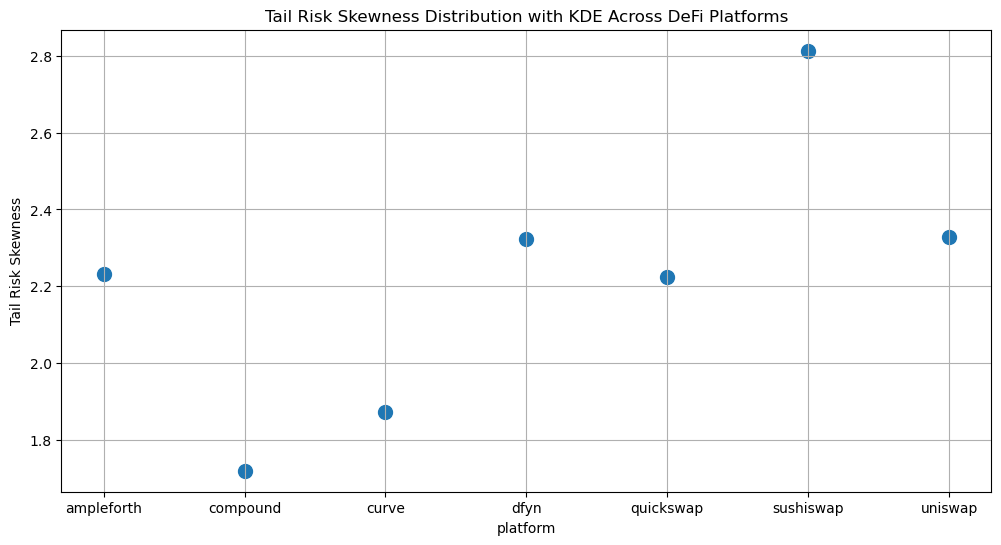

In [54]:
# Reset index to ensure platform names are correctly set as the index
stats_df.reset_index(inplace=True)
stats_df.set_index('platform', inplace=True)

# Check the structure of stats_df
print("\nFormatted Statistics DataFrame for Visualization:")
print(stats_df)


In [ ]:
SPEED ANALYSIS - AVERAGE TIME BETWEEN TRANSACTIONS

In [70]:
import pandas as pd
import numpy as np
import os

# Define the path to the folder containing the CSV files
folder_path = 'C:\\Users\\Aravind anand\\Documents\\diss code\\All Avg time bw transactions'  
# Initialize an empty list to hold DataFrames
data_list = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        print(f"Reading file: {filename}")  # Debug: Print the file being read
        file_path = os.path.join(folder_path, filename)
        
        # Load each CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Extract platform name from the filename
        platform_name = filename.split('.')[0]
        print(f"Platform name extracted: {platform_name}")  # Debug: Print platform name
        
        # Add platform name as a new column in the DataFrame
        df['platform'] = platform_name
        
        # Convert 'DateTime' column to datetime format if needed
        try:
            df['DateTime'] = pd.to_datetime(df['DateTime'], format='mixed', dayfirst=True)
        except Exception as e:
            print(f"Error converting date in {filename}: {e}")
            continue
        
        # Append the DataFrame to the list
        data_list.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(data_list, ignore_index=True)

# Check available columns
print("Available columns in the combined DataFrame:")
print(combined_df.columns)

# Calculate average time between transactions for each platform using the 'Seconds' column
avg_time_between_transactions = combined_df.groupby('platform')['Seconds'].mean()

print("\nAverage Time Between Transactions for Each Platform (in seconds):")
print(avg_time_between_transactions)

# Convert to DataFrame for easier plotting or further analysis
avg_time_between_transactions_df = avg_time_between_transactions.reset_index()
avg_time_between_transactions_df.columns = ['Platform', 'Avg Time Between Transactions']
avg_time_between_transactions_df = avg_time_between_transactions_df.sort_values(by='Avg Time Between Transactions', ascending=True)  # Sort by avg time for visualization

# Display the DataFrame
print("\nAverage Time Between Transactions DataFrame:")
print(avg_time_between_transactions_df)


Reading file: Ampleforth.csv
Platform name extracted: Ampleforth
Reading file: Compound.csv
Platform name extracted: Compound
Reading file: Curve.csv
Platform name extracted: Curve
Reading file: Dfyn.csv
Platform name extracted: Dfyn
Reading file: Quickswap.csv
Platform name extracted: Quickswap
Reading file: Sushiswap.csv
Platform name extracted: Sushiswap
Reading file: Uniswap.csv
Platform name extracted: Uniswap
Available columns in the combined DataFrame:
Index(['DateTime', 'Seconds', 'Price', 'platform'], dtype='object')

Average Time Between Transactions for Each Platform (in seconds):
platform
Ampleforth     2078.330581
Compound       4471.576710
Curve            74.836818
Dfyn          10428.674233
Quickswap     11037.546235
Sushiswap       168.060669
Uniswap          87.743985
Name: Seconds, dtype: float64

Average Time Between Transactions DataFrame:
     Platform  Avg Time Between Transactions
2       Curve                      74.836818
6     Uniswap                      87

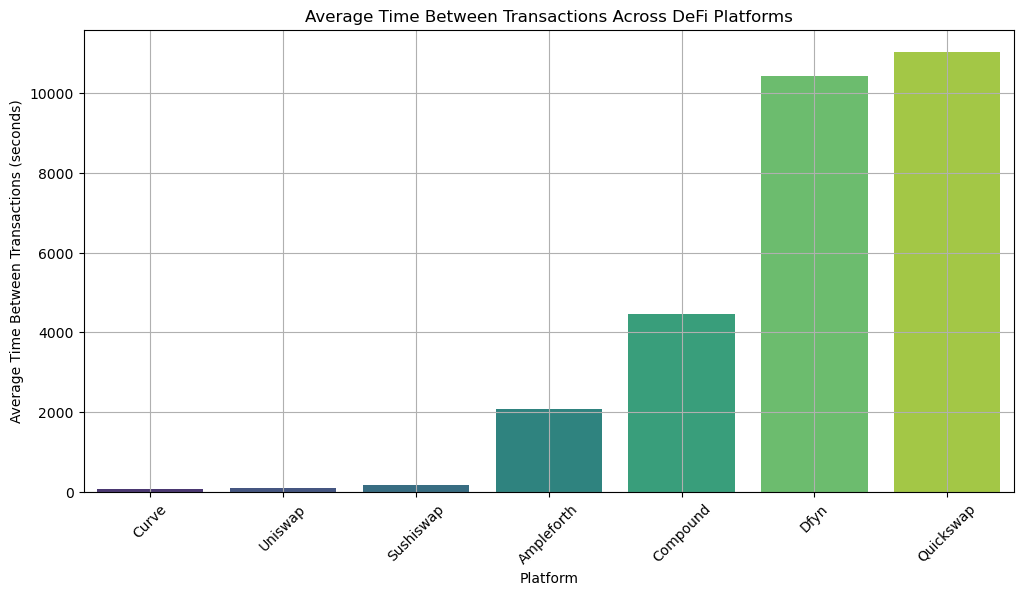

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming avg_time_between_transactions_df is defined and contains the average times
# Rename 'Avg Time Between Transactions' to 'Mean Block Time' for clarity in the plot
avg_time_between_transactions_df.rename(columns={'Avg Time Between Transactions': 'Mean Block Time'}, inplace=True)

# Create a bar plot to visualize the average time between transactions across platforms
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Mean Block Time', data=avg_time_between_transactions_df, palette='viridis')
plt.title('Average Time Between Transactions Across DeFi Platforms')
plt.xlabel('Platform')
plt.ylabel('Average Time Between Transactions (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
RELIABILITY ANALYSIS - DAILY ACTIVE ADDRESSES

In [74]:
import pandas as pd
import os

# Define the path to the folder containing the CSV files
folder_path = 'C:\\Users\\Aravind anand\\Documents\\diss code\\ALL daily Active Addresses'  

# Initialize an empty list to hold DataFrames
data_list = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        print(f"\nReading file: {filename}")  # Debug: Print the file being read
        file_path = os.path.join(folder_path, filename)
        
        # Load each CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Extract platform name from the filename
        platform_name = filename.split('.')[0]
        print(f"Platform name extracted: {platform_name}")  # Debug: Print platform name
        
        # Add platform name as a new column in the DataFrame
        df['platform'] = platform_name
        
        # Check columns of the DataFrame for debugging
        print(f"Columns in {filename}: {df.columns.tolist()}")  # Debug: Print column names
        
        # Ensure the 'DateTime' column is in datetime format
        df['DateTime'] = pd.to_datetime(df['DateTime'], format='mixed',dayfirst=True )

        # Append the DataFrame to the list
        data_list.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(data_list, ignore_index=True)

# Check available columns in the combined DataFrame
print("\nAvailable columns in the combined DataFrame after concatenation:")
print(combined_df.columns)



Reading file: Ampleforth.csv
Platform name extracted: Ampleforth
Columns in Ampleforth.csv: ['DateTime', 'New Addresses', 'Active Addresses', 'Zero Balance Addresses', 'Price', 'platform']

Reading file: Compound.csv
Platform name extracted: Compound
Columns in Compound.csv: ['DateTime', 'New Addresses', 'Active Addresses', 'Zero Balance Addresses', 'Price', 'platform']

Reading file: Curve.csv
Platform name extracted: Curve
Columns in Curve.csv: ['DateTime', 'New Addresses', 'Active Addresses', 'Zero Balance Addresses', 'Price', 'platform']

Reading file: Dfyn.csv
Platform name extracted: Dfyn
Columns in Dfyn.csv: ['DateTime', 'New Addresses', 'Active Addresses', 'Zero Balance Addresses', 'Price', 'platform']

Reading file: Quickswap.csv
Platform name extracted: Quickswap
Columns in Quickswap.csv: ['DateTime', 'New Addresses', 'Active Addresses', 'Zero Balance Addresses', 'Price', 'platform']

Reading file: Sushiswap.csv
Platform name extracted: Sushiswap
Columns in Sushiswap.csv: ['

In [75]:
import pandas as pd
import os

# Ensure 'DateTime' is in datetime format and sort by it
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'], format='mixed', dayfirst=True )
combined_df = combined_df.sort_values(by=['platform', 'DateTime'])

# Calculate cumulative sums for new addresses and active addresses
combined_df['Cumulative New Addresses'] = combined_df.groupby('platform')['New Addresses'].cumsum()
combined_df['Cumulative Active Addresses'] = combined_df.groupby('platform')['Active Addresses'].cumsum()

# Check the updated DataFrame
print("\nUpdated DataFrame with Cumulative Sums:")
print(combined_df[['DateTime', 'platform', 'New Addresses', 'Active Addresses', 'Cumulative New Addresses', 'Cumulative Active Addresses']].head())



Updated DataFrame with Cumulative Sums:
    DateTime    platform  New Addresses  Active Addresses  \
0 2019-06-10  Ampleforth           1.00              1.00   
1 2019-06-17  Ampleforth           1.14              1.29   
2 2019-06-24  Ampleforth          81.29            119.43   
3 2019-07-01  Ampleforth           9.29             35.86   
4 2019-07-08  Ampleforth           7.14             34.57   

   Cumulative New Addresses  Cumulative Active Addresses  
0                      1.00                         1.00  
1                      2.14                         2.29  
2                     83.43                       121.72  
3                     92.72                       157.58  
4                     99.86                       192.15  


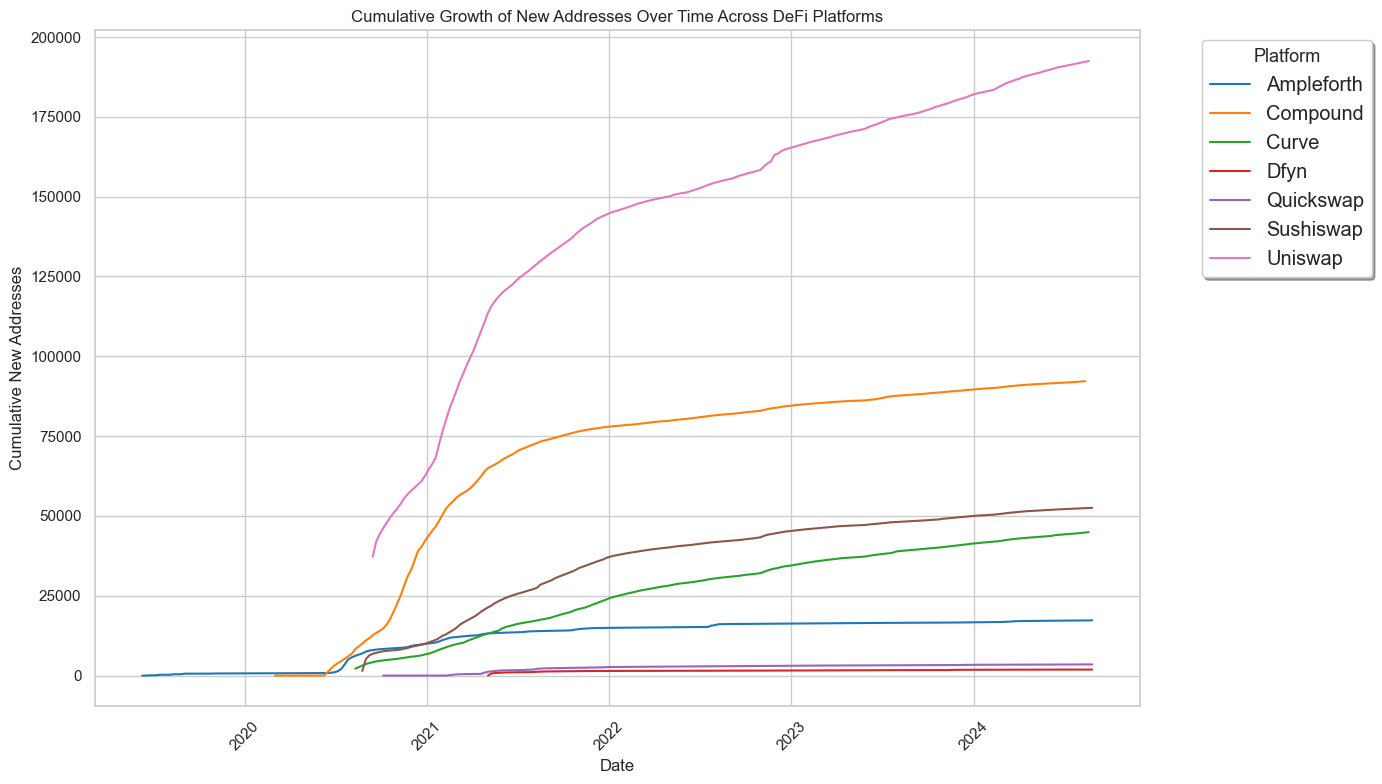

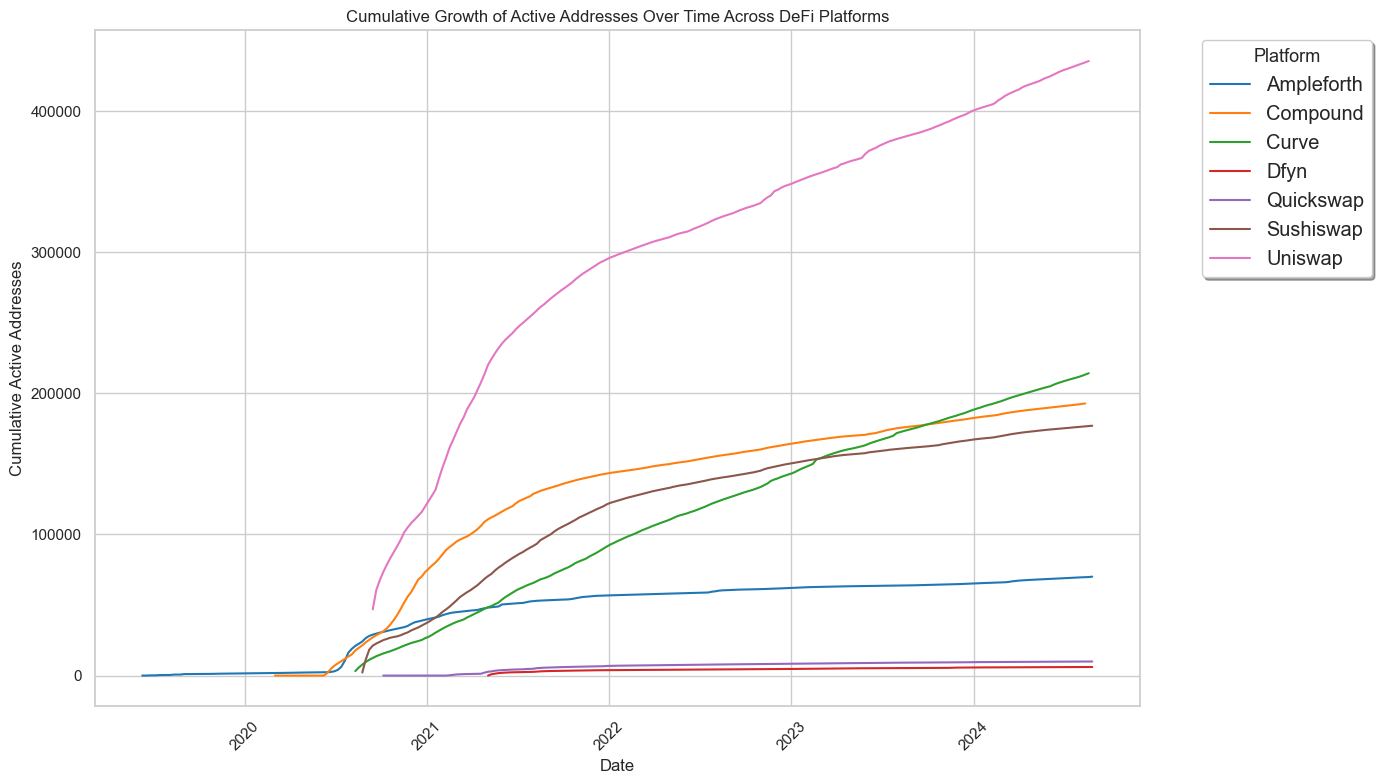

In [77]:
# Set plot style
sns.set(style="whitegrid")

# Create a line chart for cumulative new addresses 
plt.figure(figsize=(14, 8))
sns.lineplot(data=combined_df, x='DateTime', y='Cumulative New Addresses', hue='platform', palette='tab10')  # Using a more vibrant palette
plt.title('Cumulative Growth of New Addresses Over Time Across DeFi Platforms')
plt.xlabel('Date')
plt.ylabel('Cumulative New Addresses')
plt.xticks(rotation=45)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large', title_fontsize='13', markerscale=1.5, frameon=True, shadow=True)
plt.tight_layout()
plt.show()

# Create a line chart for cumulative active addresses 
plt.figure(figsize=(14, 8))
sns.lineplot(data=combined_df, x='DateTime', y='Cumulative Active Addresses', hue='platform', palette='tab10')  # Using the same vibrant palette
plt.title('Cumulative Growth of Active Addresses Over Time Across DeFi Platforms')
plt.xlabel('Date')
plt.ylabel('Cumulative Active Addresses')
plt.xticks(rotation=45)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large', title_fontsize='13', markerscale=1.5, frameon=True, shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
INTEGRITY ANALYSIS -TOTAL OUTFLOWS VOLUME 


Reading file: Ampleforth.csv
Platform name extracted: Ampleforth
Columns in Ampleforth.csv: ['DateTime', 'Aggregated Exchanges', 'Price', 'platform']

Reading file: Compound.csv
Platform name extracted: Compound
Columns in Compound.csv: ['DateTime', 'Aggregated Exchanges', 'Price', 'platform']

Reading file: Curve.csv
Platform name extracted: Curve
Columns in Curve.csv: ['DateTime', 'Aggregated Exchanges', 'Price', 'platform']

Reading file: Sushiswap.csv
Platform name extracted: Sushiswap
Columns in Sushiswap.csv: ['DateTime', 'Aggregated Exchanges', 'Price', 'platform']

Reading file: Uniswap.csv
Platform name extracted: Uniswap
Columns in Uniswap.csv: ['DateTime', 'Aggregated Exchanges', 'Price', 'platform']

Available columns in the combined DataFrame after concatenation:
Index(['DateTime', 'Aggregated Exchanges', 'Price', 'platform'], dtype='object')


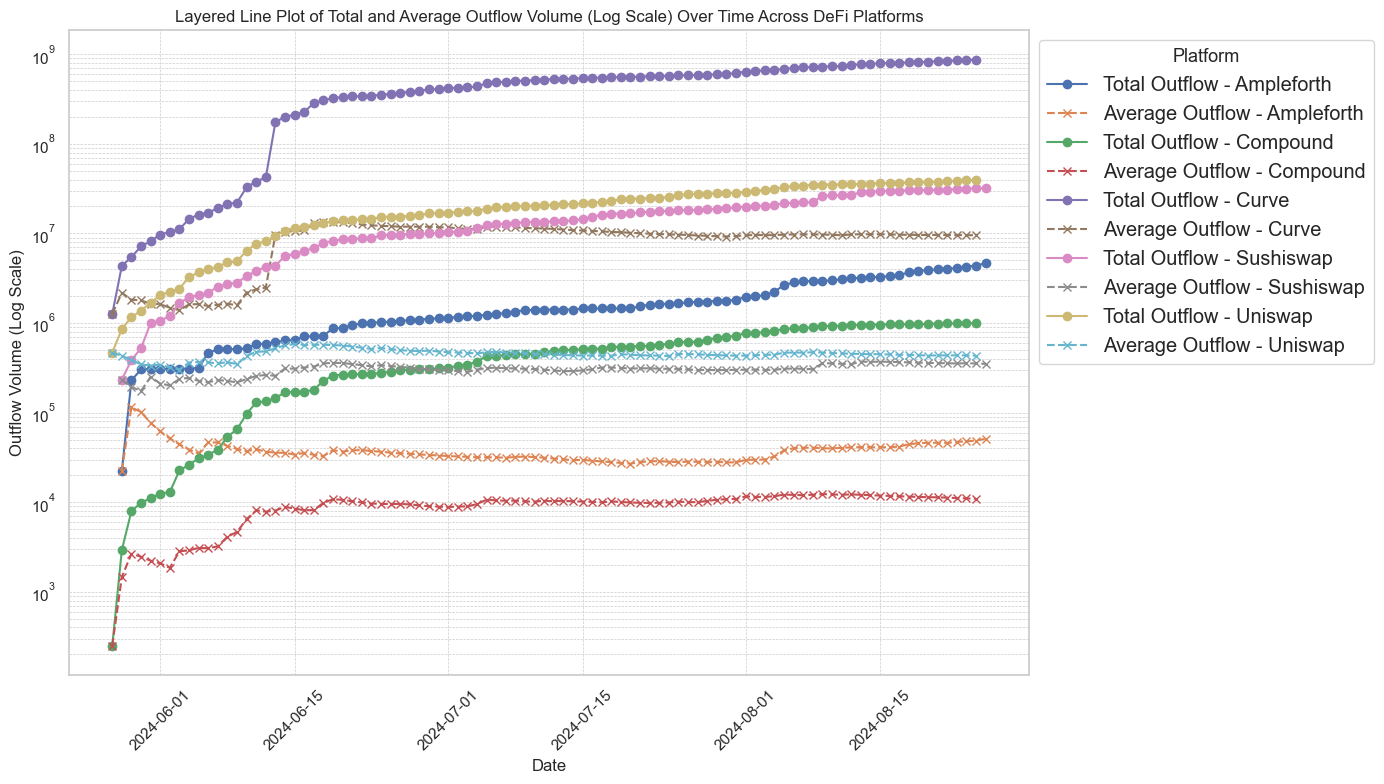

In [24]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read and Combine CSV Files

# Define the path to the folder containing the CSV files
folder_path = 'C:\\Users\\Aravind anand\\Documents\\diss code\\All Outflows Volume'  

# Initialize an empty list to hold DataFrames
data_list = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        print(f"\nReading file: {filename}")  # Debug: Print the file being read
        file_path = os.path.join(folder_path, filename)
        
        # Load each CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Extract platform name from the filename
        platform_name = filename.split('.')[0]
        print(f"Platform name extracted: {platform_name}")  # Debug: Print platform name
        
        # Add platform name as a new column in the DataFrame
        df['platform'] = platform_name
        
        # Check columns of the DataFrame for debugging
        print(f"Columns in {filename}: {df.columns.tolist()}")  # Debug: Print column names
        
        # Ensure the 'DateTime' column is in datetime format
        df['DateTime'] = pd.to_datetime(df['DateTime'], format='mixed', dayfirst=True)

        # Append the DataFrame to the list
        data_list.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(data_list, ignore_index=True)

# Check available columns in the combined DataFrame
print("\nAvailable columns in the combined DataFrame after concatenation:")
print(combined_df.columns)

# Step 2: Visualization with Layered Line Plot and Logarithmic Scale

# Set plot style 
sns.set(style="whitegrid")

# Prepare data for layered line plots with log scale
plt.figure(figsize=(14, 8))

# List of unique platforms
platforms = combined_df['platform'].unique()

# Plot total and average outflow volumes for each platform
for platform in platforms:
    platform_data = combined_df[combined_df['platform'] == platform]
    
    # Line plot for total outflow volume with log scale
    plt.plot(platform_data['DateTime'], 
             platform_data['Aggregated Exchanges'].cumsum(), 
             label=f'Total Outflow - {platform}', 
             linestyle='-', marker='o', linewidth=1.5)

    # Line plot for average outflow volume with log scale
    plt.plot(platform_data['DateTime'], 
             platform_data['Aggregated Exchanges'].expanding().mean(), 
             label=f'Average Outflow - {platform}', 
             linestyle='--', marker='x', linewidth=1.5)

# Apply logarithmic scale to y-axis
plt.yscale('log')

# Customize the plot
plt.title('Layered Line Plot of Total and Average Outflow Volume (Log Scale) Over Time Across DeFi Platforms')
plt.xlabel('Date')
plt.ylabel('Outflow Volume (Log Scale)')
plt.xticks(rotation=45)
plt.legend(title='Platform', fontsize='large', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
INTEGRITY ANALYSIS - TOTAL INFLOWS VOLUME 

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 1: Read and Combine CSV Files

# Define the path to the folder containing the CSV files
folder_path = 'C:\\Users\\Aravind anand\\Documents\\diss code\\All Inflows Volume'  

# Initialize an empty list to hold DataFrames
data_list = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        print(f"\nReading file: {filename}")  # Debug: Print the file being read
        file_path = os.path.join(folder_path, filename)
        
        # Load each CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Extract platform name from the filename
        platform_name = filename.split('.')[0]
        print(f"Platform name extracted: {platform_name}")  # Debug: Print platform name
        
        # Add platform name as a new column in the DataFrame
        df['platform'] = platform_name
        
        # Check columns of the DataFrame for debugging
        print(f"Columns in {filename}: {df.columns.tolist()}")  # Debug: Print column names
        
        # Ensure the 'DateTime' column is in datetime format with the correct format settings
        df['DateTime'] = pd.to_datetime(df['DateTime'], format='mixed', dayfirst=True)

        # Append the DataFrame to the list
        data_list.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(data_list, ignore_index=True)

# Check available columns in the combined DataFrame
print("\nAvailable columns in the combined DataFrame after concatenation:")
print(combined_df.columns)



Reading file: Ampleforth.csv
Platform name extracted: Ampleforth
Columns in Ampleforth.csv: ['DateTime', 'Aggregated Exchanges', 'Price', 'platform']

Reading file: Compound.csv
Platform name extracted: Compound
Columns in Compound.csv: ['DateTime', 'Aggregated Exchanges', 'Price', 'platform']

Reading file: Curve.csv
Platform name extracted: Curve
Columns in Curve.csv: ['DateTime', 'Aggregated Exchanges', 'Price', 'platform']

Reading file: Sushiswap.csv
Platform name extracted: Sushiswap
Columns in Sushiswap.csv: ['DateTime', 'Aggregated Exchanges', 'Price', 'platform']

Reading file: Uniswap.csv
Platform name extracted: Uniswap
Columns in Uniswap.csv: ['DateTime', 'Aggregated Exchanges', 'Price', 'platform']

Available columns in the combined DataFrame after concatenation:
Index(['DateTime', 'Aggregated Exchanges', 'Price', 'platform'], dtype='object')


In [7]:
# Calculate the total inflow volume for each platform
total_inflow_volume = combined_df.groupby('platform')['Aggregated Exchanges'].sum()

# Calculate the average inflow volume for each platform
average_inflow_volume = combined_df.groupby('platform')['Aggregated Exchanges'].mean()

print("\nTotal Inflow Volume for Each Platform:")
print(total_inflow_volume)

print("\nAverage Inflow Volume for Each Platform:")
print(average_inflow_volume)

# Convert to DataFrame for easier plotting or further analysis
inflow_volume_df = pd.DataFrame({
    'Total Inflow Volume': total_inflow_volume,
    'Average Inflow Volume': average_inflow_volume
}).reset_index()

inflow_volume_df = inflow_volume_df.sort_values(by='Total Inflow Volume', ascending=False)  # Sort by total inflow volume for visualization

# Display the DataFrame
print("\nInflow Volume DataFrame:")
print(inflow_volume_df)



Total Inflow Volume for Each Platform:
platform
Ampleforth    5.201991e+06
Compound      8.288294e+05
Curve         9.890896e+08
Sushiswap     3.462681e+07
Uniswap       3.963514e+07
Name: Aggregated Exchanges, dtype: float64

Average Inflow Volume for Each Platform:
platform
Ampleforth    5.716473e+04
Compound      9.108015e+03
Curve         1.086912e+07
Sushiswap     3.805144e+05
Uniswap       4.355509e+05
Name: Aggregated Exchanges, dtype: float64

Inflow Volume DataFrame:
     platform  Total Inflow Volume  Average Inflow Volume
2       Curve         9.890896e+08           1.086912e+07
4     Uniswap         3.963514e+07           4.355509e+05
3   Sushiswap         3.462681e+07           3.805144e+05
0  Ampleforth         5.201991e+06           5.716473e+04
1    Compound         8.288294e+05           9.108015e+03


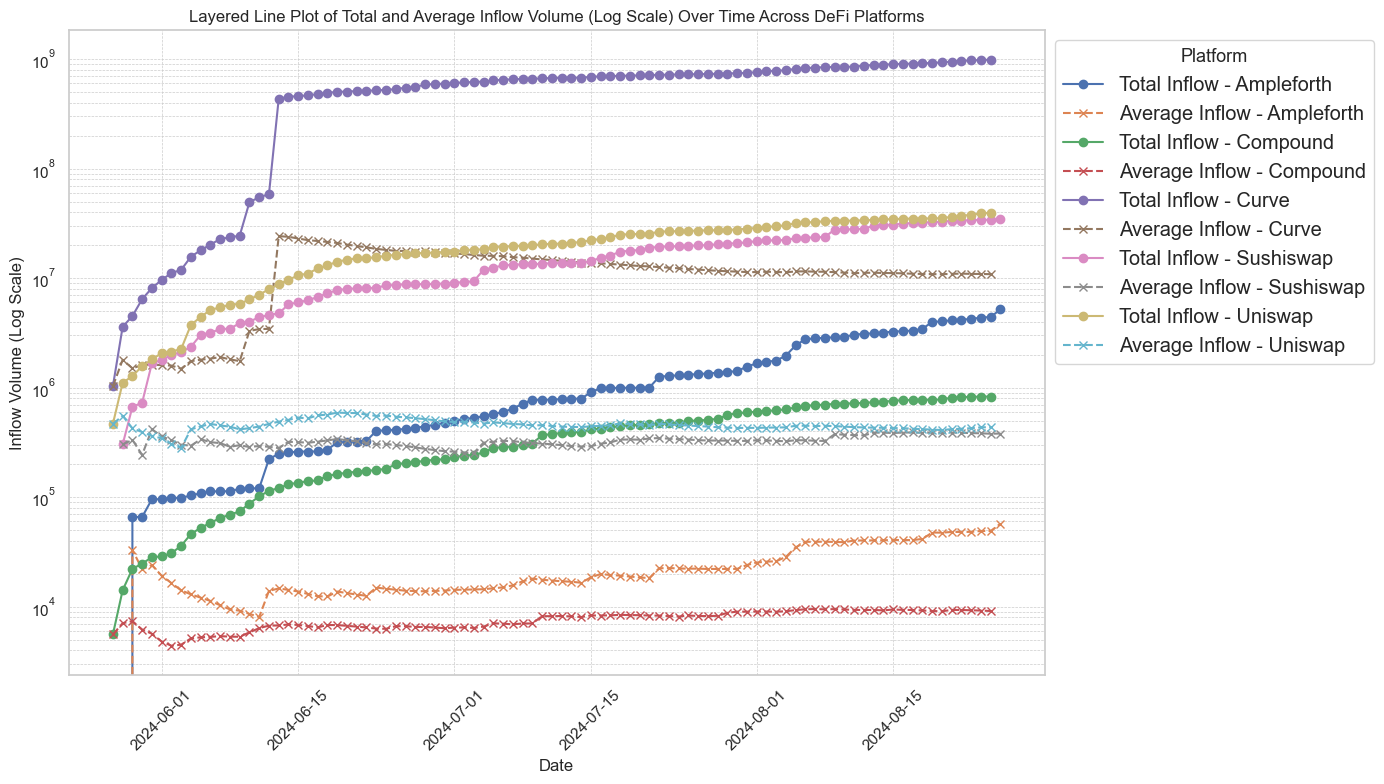

In [8]:
# Set plot style for better aesthetics
sns.set(style="whitegrid")

# Prepare data for layered line plots with log scale
plt.figure(figsize=(14, 8))

# List of unique platforms
platforms = combined_df['platform'].unique()

# Plot total and average inflow volumes for each platform
for platform in platforms:
    platform_data = combined_df[combined_df['platform'] == platform]
    
    # Line plot for total inflow volume with log scale
    plt.plot(platform_data['DateTime'], 
             platform_data['Aggregated Exchanges'].cumsum(), 
             label=f'Total Inflow - {platform}', 
             linestyle='-', marker='o', linewidth=1.5)

    # Line plot for average inflow volume with log scale
    plt.plot(platform_data['DateTime'], 
             platform_data['Aggregated Exchanges'].expanding().mean(), 
             label=f'Average Inflow - {platform}', 
             linestyle='--', marker='x', linewidth=1.5)

# Apply logarithmic scale to y-axis
plt.yscale('log')

# Customize the plot
plt.title('Layered Line Plot of Total and Average Inflow Volume (Log Scale) Over Time Across DeFi Platforms')
plt.xlabel('Date')
plt.ylabel('Inflow Volume (Log Scale)')
plt.xticks(rotation=45)
plt.legend(title='Platform', fontsize='large', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
PRIVACY ANALYSIS - TOTAL ADDRESSES 

In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 1: Read and Combine CSV Files

# Define the path to the folder containing the CSV files
folder_path = 'C:\\Users\\Aravind anand\\Documents\\diss code\\All Total Addresses'  

# Initialize an empty list to hold DataFrames
data_list = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        print(f"\nReading file: {filename}")  # Debug: Print the file being read
        file_path = os.path.join(folder_path, filename)
        
        # Load each CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Extract platform name from the filename
        platform_name = filename.split('.')[0]
        print(f"Platform name extracted: {platform_name}")  # Debug: Print platform name
        
        # Add platform name as a new column in the DataFrame
        df['platform'] = platform_name
        
        # Check columns of the DataFrame for debugging
        print(f"Columns in {filename}: {df.columns.tolist()}")  # Debug: Print column names
        
        # Ensure the 'DateTime' column is in datetime format
        df['DateTime'] = pd.to_datetime(df['DateTime'], format='mixed', dayfirst=True)

        # Append the DataFrame to the list
        data_list.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(data_list, ignore_index=True)

# Check available columns in the combined DataFrame
print("\nAvailable columns in the combined DataFrame after concatenation:")
print(combined_df.columns)



Reading file: Ampleforth.csv
Platform name extracted: Ampleforth
Columns in Ampleforth.csv: ['DateTime', 'Total With Balance', 'Price', 'platform']

Reading file: Compound.csv
Platform name extracted: Compound
Columns in Compound.csv: ['DateTime', 'Total With Balance', 'Price', 'platform']

Reading file: Curve.csv
Platform name extracted: Curve
Columns in Curve.csv: ['DateTime', 'Total With Balance', 'Price', 'platform']

Reading file: Dfyn.csv
Platform name extracted: Dfyn
Columns in Dfyn.csv: ['DateTime', 'Total With Balance', 'Price', 'platform']

Reading file: Quickswap.csv
Platform name extracted: Quickswap
Columns in Quickswap.csv: ['DateTime', 'Total With Balance', 'Price', 'platform']

Reading file: Sushiswap.csv
Platform name extracted: Sushiswap
Columns in Sushiswap.csv: ['DateTime', 'Total With Balance', 'Price', 'platform']

Reading file: Uniswap.csv
Platform name extracted: Uniswap
Columns in Uniswap.csv: ['DateTime', 'Total With Balance', 'Price', 'platform']

Available 

In [10]:
# Ensure data is sorted by platform and DateTime for accurate cumulative calculations
combined_df = combined_df.sort_values(by=['platform', 'DateTime'])

# Calculate the cumulative total number of unique addresses for each platform
combined_df['Cumulative Total Addresses'] = combined_df.groupby('platform')['Total With Balance'].cumsum()

# Check the updated DataFrame
print("\nUpdated DataFrame with Cumulative Total Addresses:")
print(combined_df[['DateTime', 'platform', 'Total With Balance', 'Cumulative Total Addresses']].head())



Updated DataFrame with Cumulative Total Addresses:
    DateTime    platform  Total With Balance  Cumulative Total Addresses
0 2019-06-10  Ampleforth                2.00                        2.00
1 2019-06-17  Ampleforth                9.00                       11.00
2 2019-06-24  Ampleforth              104.29                      115.29
3 2019-07-01  Ampleforth              214.86                      330.15
4 2019-07-08  Ampleforth              256.57                      586.72


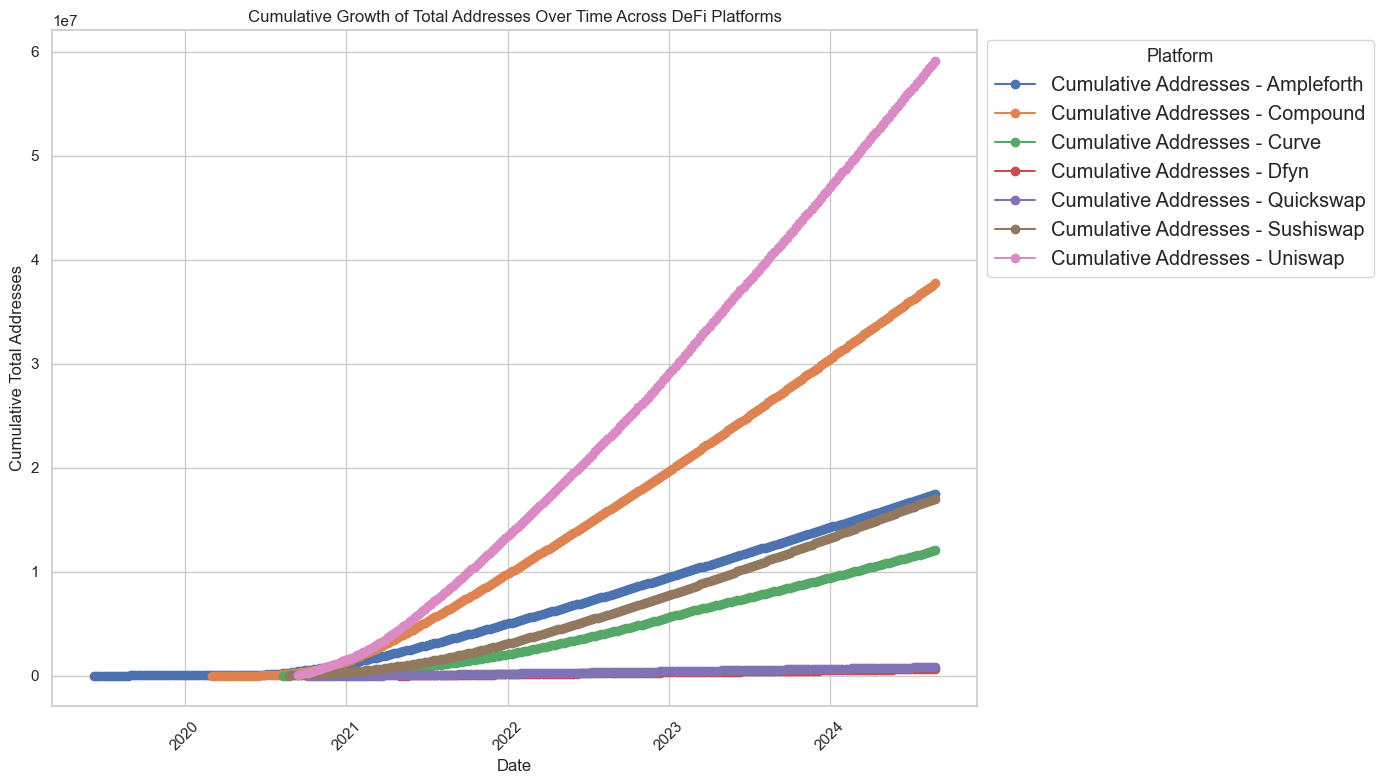

In [11]:
# Set plot style 
sns.set(style="whitegrid")

# Prepare data for line plot
plt.figure(figsize=(14, 8))

# List of unique platforms
platforms = combined_df['platform'].unique()

# Plot cumulative total addresses for each platform
for platform in platforms:
    platform_data = combined_df[combined_df['platform'] == platform]
    
    # Line plot for cumulative total addresses
    plt.plot(platform_data['DateTime'], 
             platform_data['Cumulative Total Addresses'], 
             label=f'Cumulative Addresses - {platform}', 
             linestyle='-', marker='o', linewidth=1.5)

# Customize the plot
plt.title('Cumulative Growth of Total Addresses Over Time Across DeFi Platforms')
plt.xlabel('Date')
plt.ylabel('Cumulative Total Addresses')
plt.xticks(rotation=45)
plt.legend(title='Platform', fontsize='large', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
RELIABILITY ANALYSIS - NUMBER OF TRANSACTIONS 

In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 1: Read and Combine CSV Files

# Define the path to the folder containing the CSV files
folder_path = 'C:\\Users\\Aravind anand\\Documents\\diss code\\All No. of transactions'  

# Initialize an empty list to hold DataFrames
data_list = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        print(f"\nReading file: {filename}")  # Debug: Print the file being read
        file_path = os.path.join(folder_path, filename)
        
        # Load each CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Extract platform name from the filename
        platform_name = filename.split('.')[0]
        print(f"Platform name extracted: {platform_name}")  # Debug: Print platform name
        
        # Add platform name as a new column in the DataFrame
        df['platform'] = platform_name
        
        # Check columns of the DataFrame for debugging
        print(f"Columns in {filename}: {df.columns.tolist()}")  # Debug: Print column names
        
        # Ensure the 'DateTime' column is in datetime format
        df['DateTime'] = pd.to_datetime(df['DateTime'], format='mixed', dayfirst=True)

        # Append the DataFrame to the list
        data_list.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(data_list, ignore_index=True)

# Check available columns in the combined DataFrame
print("\nAvailable columns in the combined DataFrame after concatenation:")
print(combined_df.columns)



Reading file: Ampleforth.csv
Platform name extracted: Ampleforth
Columns in Ampleforth.csv: ['DateTime', 'Number Of Transactions', 'Price', 'platform']

Reading file: Compound.csv
Platform name extracted: Compound
Columns in Compound.csv: ['DateTime', 'Number Of Transactions', 'Price', 'platform']

Reading file: Curve.csv
Platform name extracted: Curve
Columns in Curve.csv: ['DateTime', 'Number Of Transactions', 'Price', 'platform']

Reading file: Dfyn.csv
Platform name extracted: Dfyn
Columns in Dfyn.csv: ['DateTime', 'Number Of Transactions', 'Price', 'platform']

Reading file: Quickswap.csv
Platform name extracted: Quickswap
Columns in Quickswap.csv: ['DateTime', 'Number Of Transactions', 'Price', 'platform']

Reading file: Sushiswap.csv
Platform name extracted: Sushiswap
Columns in Sushiswap.csv: ['DateTime', 'Number Of Transactions', 'Price', 'platform']

Reading file: Uniswap.csv
Platform name extracted: Uniswap
Columns in Uniswap.csv: ['DateTime', 'Number Of Transactions', 'Pri

In [13]:
# Ensure data is sorted by platform and DateTime for accurate cumulative calculations
combined_df = combined_df.sort_values(by=['platform', 'DateTime'])

# Calculate the cumulative number of transactions for each platform
combined_df['Cumulative Transactions'] = combined_df.groupby('platform')['Number Of Transactions'].cumsum()

# Check the updated DataFrame
print("\nUpdated DataFrame with Cumulative Transactions:")
print(combined_df[['DateTime', 'platform', 'Number Of Transactions', 'Cumulative Transactions']].head())



Updated DataFrame with Cumulative Transactions:
    DateTime    platform  Number Of Transactions  Cumulative Transactions
0 2019-06-10  Ampleforth                       2                        2
1 2019-06-17  Ampleforth                       8                       10
2 2019-06-24  Ampleforth                    1035                     1045
3 2019-07-01  Ampleforth                     283                     1328
4 2019-07-08  Ampleforth                     280                     1608


<Figure size 1400x800 with 0 Axes>

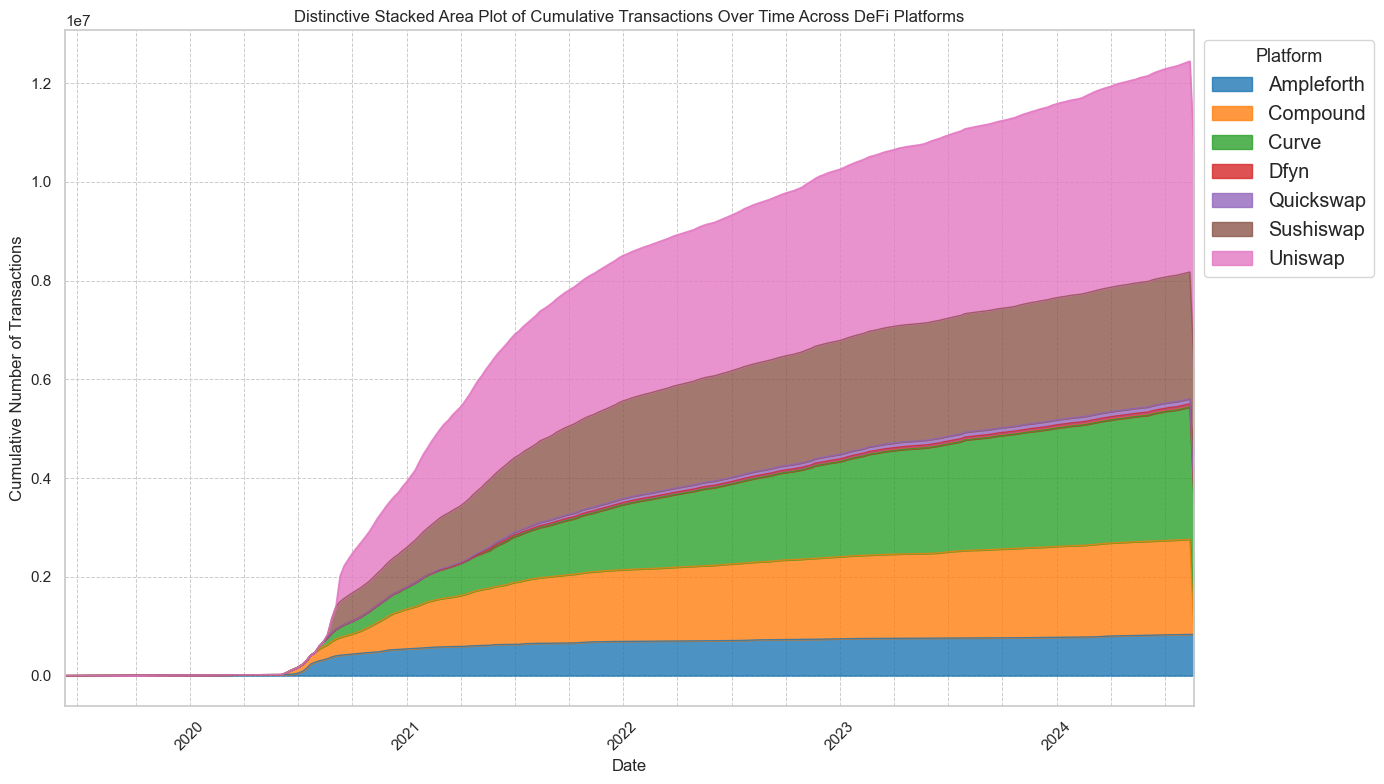

In [17]:
# Set plot style
sns.set(style="whitegrid")

# Pivot the data to create a stacked format
pivot_df = combined_df.pivot(index='DateTime', columns='platform', values='Cumulative Transactions')

# Prepare figure and axes for plotting
plt.figure(figsize=(14, 8))

# Plot the stacked area plot with a vibrant color palette
colors = sns.color_palette("tab10", len(pivot_df.columns))
pivot_df.plot(kind='area', stacked=True, alpha=0.8, figsize=(14, 8), color=colors, linewidth=1)

# Customize the plot
plt.title('Distinctive Stacked Area Plot of Cumulative Transactions Over Time Across DeFi Platforms')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Transactions')
plt.xticks(rotation=45)

# Improve legend readability
plt.legend(title='Platform', fontsize='large', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1))

# Add grid lines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Show the plot
plt.tight_layout()
plt.show()